In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pathlib import Path
from scipy import stats
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.formula.api import gls

In [2]:
phd = pd.read_csv("PhD_fixed.csv")
ref = pd.read_csv("References data.csv")
#phd_temp = pd.read_csv("theses.csv", parse_dates=[
#                        'Date de premiere inscription en doctorat','Date de soutenance'])

C:\Users\Maxime\AppData\Local\Temp\ipykernel_20416\521091552.py:1: DtypeWarning: Columns (5,16) have mixed types. Specify dtype option on import or set low_memory=False.
  phd = pd.read_csv("PhD_fixed.csv")


In [3]:
phd_temp = phd.dropna(subset=['Langue.de.la.these'])

In [4]:
phd_langue = phd_temp.loc[(phd_temp['Langue.de.la.these'] == 'fr') | (phd_temp['Langue.de.la.these'] == 'en') | (phd_temp['Langue.de.la.these'] == 'FR') | (phd_temp['Langue.de.la.these'] == 'EN') | (phd_temp['Langue.de.la.these'] == 'enfr') | (phd_temp['Langue.de.la.these'] == 'fren')]
phd_langue.replace({"Langue.de.la.these": {"FR": "fr", "EN": "en", "enfr": "Bilingual", "fren": "Bilingual"}}, inplace=True)

C:\Users\Maxime\AppData\Local\Temp\ipykernel_20416\304985582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phd_langue.replace({"Langue.de.la.these": {"FR": "fr", "EN": "en", "enfr": "Bilingual", "fren": "Bilingual"}}, inplace=True)


In [5]:
phd_langue_2010s = phd_langue.loc[(phd_langue['Year'] >= 2010) & (phd_langue['Year'] <= 2018)]

In [6]:
# Proportion of woman in function of the language of the thesis between 2010-2020
from locale import normalize

phd_langue_2010s_gender = phd_langue_2010s.dropna(subset=['Genre'])
phd_langue_2010s_gender.replace({"Genre": {"mostly_female": "female","mostly_male":"male"}}, inplace=True)
phd_langue_2010s_gender.drop(["Date.de.premiere.inscription.en.doctorat","Date.de.soutenance"],axis=1,inplace=True)
phd_langue_2010s_gender = phd_langue_2010s_gender[(phd_langue_2010s_gender["Genre"] != "unknown") & (phd_langue_2010s_gender["Genre"] != "andy")]

In [7]:
# histogram of the number of thesis per year per language and gender in phd_langue_2010s_gender with plotly
fig = px.histogram(phd_langue_2010s_gender,histnorm="percent", x="Year", color="Genre", barmode="group", title="Proportion of thesis for the years 2010-2018 per year per language in function of the gender", facet_col="Langue.de.la.these", facet_col_wrap=2, labels={"Year": "Year", "count": "Number of thesis", "Langue.de.la.these": "Language of the thesis"})
fig.show()
fig = px.histogram(phd_langue_2010s_gender, x="Year", color="Genre", barmode="group", title="Number of thesis per year per language in function of the gender", facet_col="Langue.de.la.these", facet_col_wrap=2, labels={"Year": "Year", "count": "Number of thesis", "Langue.de.la.these": "Language of the thesis"})
fig.show()

In [8]:
test = phd_langue_2010s_gender[(phd_langue_2010s_gender["Genre"] != "unknown") & (phd_langue_2010s_gender["Genre"] != "andy")].groupby(by=["Year","Langue.de.la.these"])["genre_value"].mean()
test = pd.DataFrame(test)
test = test.reset_index()
test.insert(3,column = "Man", value= (1 - test.genre_value) * 100)
test.rename(columns = {"genre_value" : "Woman"}, inplace = True)
test["Woman"] = test["Woman"].apply(lambda x: x * 100)
px.line(test, x="Year", y= ["Woman"],color = "Langue.de.la.these", title="Porportion of thesis written by woman per year per language", labels={"Year": "Year", "value": "% of thesis writen", "Langue.de.la.these": "Language of the thesis"})

c:\Users\Maxime\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:5215: RuntimeWarning:

overflow encountered in longlong_scalars



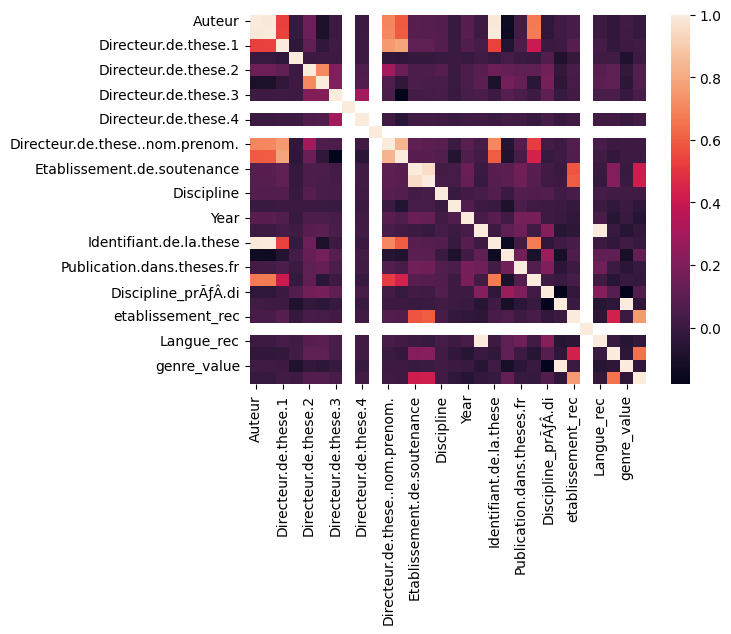

In [9]:
uniform_data = phd_langue_2010s_gender.apply(lambda x : pd.factorize(x)[0]).corr(method='kendall', min_periods=1)
ax = sns.heatmap(uniform_data,fmt= ".2f")

In [10]:
idex1 = set(phd["Auteur"])
idex2 = set(phd["Directeur.de.these.1"])
idex1.intersection(idex2)
phd_defender = phd[(phd["Auteur"].isin(idex1.intersection(idex2))) | (phd["Directeur.de.these.1"].isin(idex1.intersection(idex2)))]
phd_defender = phd_defender.dropna(subset=['Date.de.soutenance'])
phd_defender = phd_defender.set_index("Date.de.soutenance")

In [11]:
chord_academy = pd.read_csv("KeplerArcs.csv")

In [12]:
Chord_edge_list = chord_academy.groupby(by=["Académie1","Académie2"]).count()
Chord_edge_list.reset_index(inplace=True)
Chord_edge_list

,Académie1,Académie2,Nom,long1,lat1,long2,lat2
0,Aix-Marseille,Aix-Marseille,193,193,193,193,193
1,Aix-Marseille,Amiens,4,4,4,4,4
2,Aix-Marseille,Besançon,3,3,3,3,3
3,Aix-Marseille,Bordeaux,19,19,19,19,19
4,Aix-Marseille,Caen,4,4,4,4,4
...,...,...,...,...,...,...,...
529,Versailles,Rennes,20,20,20,20,20
530,Versailles,Rouen,11,11,11,11,11
531,Versailles,Strasbourg,36,36,36,36,36
532,Versailles,Toulouse,34,34,34,34,34


In [13]:
for index, row in Chord_edge_list.iterrows():
    Chord_edge_list.loc[(Chord_edge_list["Académie1"] == row["Académie1"]) & (Chord_edge_list["Académie2"] == row["Académie2"]),"long1"] = chord_academy.loc[(chord_academy["Académie1"] == row["Académie1"]) & (chord_academy["Académie2"] == row["Académie2"]),"long1"].unique()[0]
    Chord_edge_list.loc[(Chord_edge_list["Académie1"] == row["Académie1"]) & (Chord_edge_list["Académie2"] == row["Académie2"]),"long2"] = chord_academy.loc[(chord_academy["Académie1"] == row["Académie1"]) & (chord_academy["Académie2"] == row["Académie2"]),"long2"].unique()[0]
    Chord_edge_list.loc[(Chord_edge_list["Académie1"] == row["Académie1"]) & (Chord_edge_list["Académie2"] == row["Académie2"]),"lat1"] = chord_academy.loc[(chord_academy["Académie1"] == row["Académie1"]) & (chord_academy["Académie2"] == row["Académie2"]),"lat1"].unique()[0]
    Chord_edge_list.loc[(Chord_edge_list["Académie1"] == row["Académie1"]) & (Chord_edge_list["Académie2"] == row["Académie2"]),"lat2"] = chord_academy.loc[(chord_academy["Académie1"] == row["Académie1"]) & (chord_academy["Académie2"] == row["Académie2"]),"lat2"].unique()[0]

In [14]:
KeplerUni = pd.read_csv("KeplerUni.csv")
KeplerUni =phd.filter(["Etablissement.de.soutenance", "Géolocalisation"])
KeplerUni = KeplerUni.drop_duplicates()
KeplerUni.dropna(axis=0, how='any', inplace=True)
KeplerUni.insert(2,"lat",KeplerUni["Géolocalisation"].str.split(",", n = 1, expand = True)[0],True)
KeplerUni.insert(3,"long",KeplerUni["Géolocalisation"].str.split(",", n = 1, expand = True)[1],True)

In [15]:
Chord_edge_list.to_csv("Chord_edge_list.csv")
KeplerUni.to_csv("Uni_geoloc.csv")

In [16]:
KeplerUniFinal = pd.read_csv("KeplerUniFinal.csv")

In [17]:
Kepler_edge_list = KeplerUniFinal.groupby(by=["Annee2","Universite1","Universite2"]).count()
Kepler_edge_list.reset_index(inplace=True)
Kepler_edge_list.drop(columns = "Annee1", inplace = True)

In [18]:
for index, row in Kepler_edge_list.iterrows():
    Kepler_edge_list.loc[(Kepler_edge_list["Universite1"] == row["Universite1"]) & (Kepler_edge_list["Universite2"] == row["Universite2"]),"Long1"] = KeplerUniFinal.loc[(KeplerUniFinal["Universite1"] == row["Universite1"]) & (KeplerUniFinal["Universite2"] == row["Universite2"]),"Long1"].unique()[0]
    Kepler_edge_list.loc[(Kepler_edge_list["Universite1"] == row["Universite1"]) & (Kepler_edge_list["Universite2"] == row["Universite2"]),"Long2"] = KeplerUniFinal.loc[(KeplerUniFinal["Universite1"] == row["Universite1"]) & (KeplerUniFinal["Universite2"] == row["Universite2"]),"Long2"].unique()[0]
    Kepler_edge_list.loc[(Kepler_edge_list["Universite1"] == row["Universite1"]) & (Kepler_edge_list["Universite2"] == row["Universite2"]),"Lat1"] = KeplerUniFinal.loc[(KeplerUniFinal["Universite1"] == row["Universite1"]) & (KeplerUniFinal["Universite2"] == row["Universite2"]),"Lat1"].unique()[0]
    Kepler_edge_list.loc[(Kepler_edge_list["Universite1"] == row["Universite1"]) & (Kepler_edge_list["Universite2"] == row["Universite2"]),"Lat2"] = KeplerUniFinal.loc[(KeplerUniFinal["Universite1"] == row["Universite1"]) & (KeplerUniFinal["Universite2"] == row["Universite2"]),"Lat2"].unique()[0]

In [19]:
Kepler_edge_list.to_csv("Kepler_edge_list.csv")

In [20]:
distance = pd.read_csv("distances_values.csv")
px.histogram(distance["1"],range_x=[0,1000],nbins=1000)

In [21]:
distance.rename(columns={"0":"Auteur","1":"distance_1","2":"distance_2","3":"distance_3","4":"distance_4","5":"distance_5","6":"distance_6","7":"distance_7"}, inplace=True)

In [22]:
distance_genre = distance.merge(phd[["Auteur","genre_value"]], on="Auteur",how="left")
distance_genre.drop_duplicates(subset="Auteur",inplace=True)
distance_man = distance_genre[distance_genre["genre_value"] == 0]
distance_woman = distance_genre[distance_genre["genre_value"] == 1]

In [23]:
U1, p = stats.mannwhitneyu(distance_man["distance_1"],distance_woman["distance_1"],alternative="two-sided")
nx, ny = len(distance_man), len(distance_woman)
p

1.393519057065026e-06

In [24]:
dist_mean_man = distance_man["distance_1"].mean()
dist_mean_woman = distance_woman["distance_1"].mean()
dist_std_man = distance_man["distance_1"].std()
dist_std_woman = distance_woman["distance_1"].std()
dist_median_man = distance_man["distance_1"].median()
dist_median_woman = distance_woman["distance_1"].median()
dist_mean_man2 = distance_man[distance_man["distance_1"] < 1000]["distance_1"].mean()
dist_mean_woman2 = distance_woman[distance_woman["distance_1"] < 1000]["distance_1"].mean()
dist_std_man2 = distance_man[distance_man["distance_1"] < 1000]["distance_1"].mean()
dist_std_woman2 = distance_woman[distance_woman["distance_1"] < 1000]["distance_1"].mean()
dist_median_man2 = distance_man[distance_man["distance_1"] < 1000]["distance_1"].mean()
dist_median_woman2 = distance_woman[distance_woman["distance_1"] < 1000]["distance_1"].mean()

In [25]:
px.bar(x=["man","woman"],y=[dist_mean_man,dist_mean_woman],error_y=[dist_std_man,dist_std_woman],error_y_minus=[420,310],labels={"x":"genre","y":"mean of the distance"})

In [26]:
px.bar(x=["man","woman"],y=[dist_mean_man2,dist_mean_woman2],error_y=[dist_std_man2,dist_std_woman2],labels={"x":"genre","y":"mean of the distance"})

In [27]:
px.bar(x=["man","woman"],y=[dist_median_man,dist_median_woman],labels={"x":"genre","y":"median of the distance"})

In [28]:
px.bar(x=["man","woman"],y=[dist_median_man2,dist_median_woman2],labels={"x":"genre","y":"median of the distance"})

In [29]:
distance_Disc = distance.merge(phd[["Auteur","Discipline_prÃƒÂ.di"]], on="Auteur",how="left")
distance_Disc = distance_Disc.drop_duplicates(subset="Auteur")
distance_Disc = distance_Disc[distance_Disc["Discipline_prÃƒÂ.di"] != "Poubelle"]
distance_Disc = distance_Disc[distance_Disc["Discipline_prÃƒÂ.di"] != "Sciences de l'education"]
distance_Disc = distance_Disc[distance_Disc["Discipline_prÃƒÂ.di"] != "Mathematiques et Informatique"]

In [30]:
Dist_test = distance_Disc.set_index('Discipline_prÃƒÂ.di', append=True).swaplevel(1,0).sort_index(level=0)

In [31]:
stats.kruskal(Dist_test.loc["SHS","distance_1"], Dist_test.loc["Medecine","distance_1"],Dist_test.loc["Biologie","distance_1"],Dist_test.loc["Science de la Terre","distance_1"],Dist_test.loc["Droit et Science Politique","distance_1"],Dist_test.loc["Economie Gestion","distance_1"],Dist_test.loc["Langues et Litteratures","distance_1"],Dist_test.loc["Psychologie","distance_1"],Dist_test.loc["Materiaux, Milieux et Chimie","distance_1"],Dist_test.loc["Science de l'ingàƒÂ©nieur","distance_1"],Dist_test.loc["Informatique","distance_1"],Dist_test.loc["MathàƒÂ©matiques","distance_1"])

KruskalResult(statistic=106.89884187851445, pvalue=7.612244377546518e-18)

In [32]:
dist_Mean_Disc = distance_Disc.groupby("Discipline_prÃƒÂ.di").mean()
dist_std_Disc = distance_Disc.groupby("Discipline_prÃƒÂ.di").std()
dist_median_Disc = distance_Disc.groupby("Discipline_prÃƒÂ.di").median()
dist_Mean_Disc2 = distance_Disc[distance_Disc["distance_1"] < 1000].groupby("Discipline_prÃƒÂ.di").mean()
dist_std_Disc2 = distance_Disc[distance_Disc["distance_1"] < 1000].groupby("Discipline_prÃƒÂ.di").std()
dist_median_Disc2 = distance_Disc[distance_Disc["distance_1"] < 1000].groupby("Discipline_prÃƒÂ.di").median()
all_disc = distance_Disc["Discipline_prÃƒÂ.di"].unique()

In [33]:
px.bar(x=all_disc,y=dist_Mean_Disc["distance_1"],error_y=dist_std_Disc["distance_1"],labels={"x":"Discipline","y":"distance"})

In [34]:
px.bar(x=all_disc,y=dist_Mean_Disc2["distance_1"],error_y=dist_std_Disc2["distance_1"],labels={"x":"Discipline","y":"mean of the distance"})

In [35]:
px.bar(x=all_disc,y=dist_median_Disc["distance_1"],labels={"x":"Discipline","y":"median of the distance"})

In [36]:
px.bar(x=all_disc,y=dist_median_Disc2["distance_1"],labels={"x":"Discipline","y":"median of the distance"})

In [37]:
px.histogram(distance_Disc["distance_1"], barmode="stack", color=distance_Disc["Discipline_prÃƒÂ.di"],range_x=[0,800],nbins=1000)

In [38]:
X, Y, x, y = distance_Disc["distance_1"], distance_Disc["Discipline_prÃƒÂ.di"],distance_genre["distance_1"], distance_genre["genre_value"]
X = X.values.reshape(-1, 1)
x = x.values.reshape(-1, 1)
model_disc = LogisticRegression(multi_class='auto', solver='lbfgs', max_iter = 5000).fit(X, Y)
model_genre = LogisticRegression(multi_class='auto', solver='lbfgs',max_iter = 5000).fit(x, y)
print("the score of the discipline is: ",model_disc.score(X, Y))
print("the score of the gender is: ",model_genre.score(x, y))

the score of the discipline is:  0.21650045330915685
the score of the gender is:  0.7699403147042865


In [39]:
distance_Disc.rename(columns={"Discipline_prÃƒÂ.di":"Discipline"},inplace=True)
model_disc = gls("distance_1 ~ Discipline", data=distance_Disc).fit()
print(model_disc.summary())

                            GLS Regression Results                            
Dep. Variable:             distance_1   R-squared:                       0.003
Model:                            GLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.295
Date:                Tue, 22 Nov 2022   Prob (F-statistic):              0.220
Time:                        10:13:23   Log-Likelihood:                -46514.
No. Observations:                5515   AIC:                         9.305e+04
Df Residuals:                    5503   BIC:                         9.313e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [40]:
model_genre = gls("distance_1 ~ genre_value", data=distance_genre).fit()
print(model_genre.summary())

                            GLS Regression Results                            
Dep. Variable:             distance_1   R-squared:                       0.002
Model:                            GLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     10.08
Date:                Tue, 22 Nov 2022   Prob (F-statistic):            0.00151
Time:                        10:13:23   Log-Likelihood:                -46627.
No. Observations:                5529   AIC:                         9.326e+04
Df Residuals:                    5527   BIC:                         9.327e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     429.7221     17.053     25.200      

In [ ]:
from statsmodels.formula.api import ols

model2 = ols("distance_1 ~ Discipline", data=distance_Disc).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:             distance_1   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.295
Date:                Fri, 28 Oct 2022   Prob (F-statistic):              0.220
Time:                        11:40:52   Log-Likelihood:                -46514.
No. Observations:                5515   AIC:                         9.305e+04
Df Residuals:                    5503   BIC:                         9.313e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

#### Todo list:
    -  model mix datacamp
    -  model mix genre discipline